# Kumpulan data ini memiliki data 1K+ Peringkat dan Ulasan Produk Amazon sesuai detailnya yang tercantum di situs web resmi Amazon 2023

In [55]:
#Pandas: Manipulasi dan analisis data
# Numpy: Operasi numerik dan perhitungan
# Matplotlib: Visualisasi data dan pembuatan plot
# Seaborn: Visualisasi data yang lebih baik dan grafik statistik
# Scipy: Komputasi ilmiah dan operasi matematika lanjutan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

# DATA CLEANING

In [56]:
##Memuat Data CSV 
df = pd.read_csv("amazon.csv")

In [57]:
# Setel opsi tampilan Pandas untuk menampilkan semua kolom
# Ketika nilai diatur ke None, tidak ada batasan jumlah kolom yang ditampilkan
pd.set_option('display.max_columns', None)

# Sekarang, ketika DataFrame dicetak, semua kolom akan ditampilkan tanpa terpotong

In [58]:
# Menampilkan 10 baris pertama dari DataFrame
print(df.head(10))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5  B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6  B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7  B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9  B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accesso

In [59]:
##Menampilkan Semua KOLOM        
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [60]:
##mendapatkan informasi tentang jumlah baris dan kolom dalam DataFrame df    
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [61]:
#Fungs  i ini untuk melihat kolom dan tipe data yang digunakan 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [62]:
#menampilkan jumlah nilai null pada semua kolom    
df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# Hasil Observasi Pertama 
Dataset ini terdiri dari 1465 entri produk, masing-masing memiliki 16 atribut deskriptif. Semua atribut direpresentasikan sebagai teks (tipe data 'objek'). Atribut-atribut ini meliputi: -->
Informasi produk: 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'img_link', 'product_link'
Informasi pengguna: 'user_id', 'user_name'
nformasi ulasan: 'review_id', 'review_title', 'review_content'
Beberapa nilai atribut hilang dari dataset dan akan ditangani nanti dalam analisis

In [63]:
#Fungsi ini merubah tipe data dari kolom "discount_percentage" dan "actual_price" dari objek ke float  
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [64]:
#mengubah data pada kolom 'discount_percentage' dalam dataset: 
# Tujuan: Menghapus simbol '%' dari nilai persentase dan mengubah tipe datanya menjadi angka desimal (float64) agar bisa digunakan dalam perhitungan matematis. dan Mengubah nilai persentase menjadi bentuk desimal. Contoh: '50%' menjadi 0.50


df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [65]:
#Fungsi ini untuk menghitung frekuensi kemunculan setiap nilai unik pada kolom    
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [66]:
# mencari baris-baris dalam DataFrame df di mana nilai kolom rating    
df.query('rating == "|"')

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1279        2499.0                 0.16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

In [67]:
# Mengganti semua karakter '|' dalam kolom 'rating' dengan nilai '3.9'. Hal ini dilakukan karena nilai '|' mungkin merupakan kesalahan atau data tidak valid dalam konteks rating.
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [68]:
#   
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [69]:
# Menampilkan kembali untuk mengecek tipe data    
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [70]:
#menghasilkan statistik deskriptif dari DataFrame df Berdasarkan informasi sebelumnya, kolom discount_percentage dan rating sudah dalam tipe data numerik. 
# Mengingat kolom-kolom dalam dataset ini, kolom yang relevan untuk analisis statistik deskriptif adalah:
# discounted_price
# actual_price
# discount_percentage
# rating
# rating_count       
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096451   
std         6944.304394   10874.826864             0.216359     0.291620   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000

In [71]:
#Menampilkan Kolom yang nilainya brnilai NULL dan diurtukan bagian paling atas    
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [72]:
# menghitung persentase nilai yang hilang (missing values) untuk setiap kolom dalam DataFrame df. Kemudian, mengurutkan hasilnya dari yang terbesar ke yang terkecil   
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

rating_count           0.14
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [73]:
# menghitung jumlah total nilai yang hilang (missing values) dalam DataFrame   
df.isnull().sum().sum()

2

# Hasil Observasi Kedua 
Mengubah semua tipe data tiap kolom menjadi object dan mengubah kembali beberapa kolom menjadi float dan ada statistik deskriptif

<Axes: >

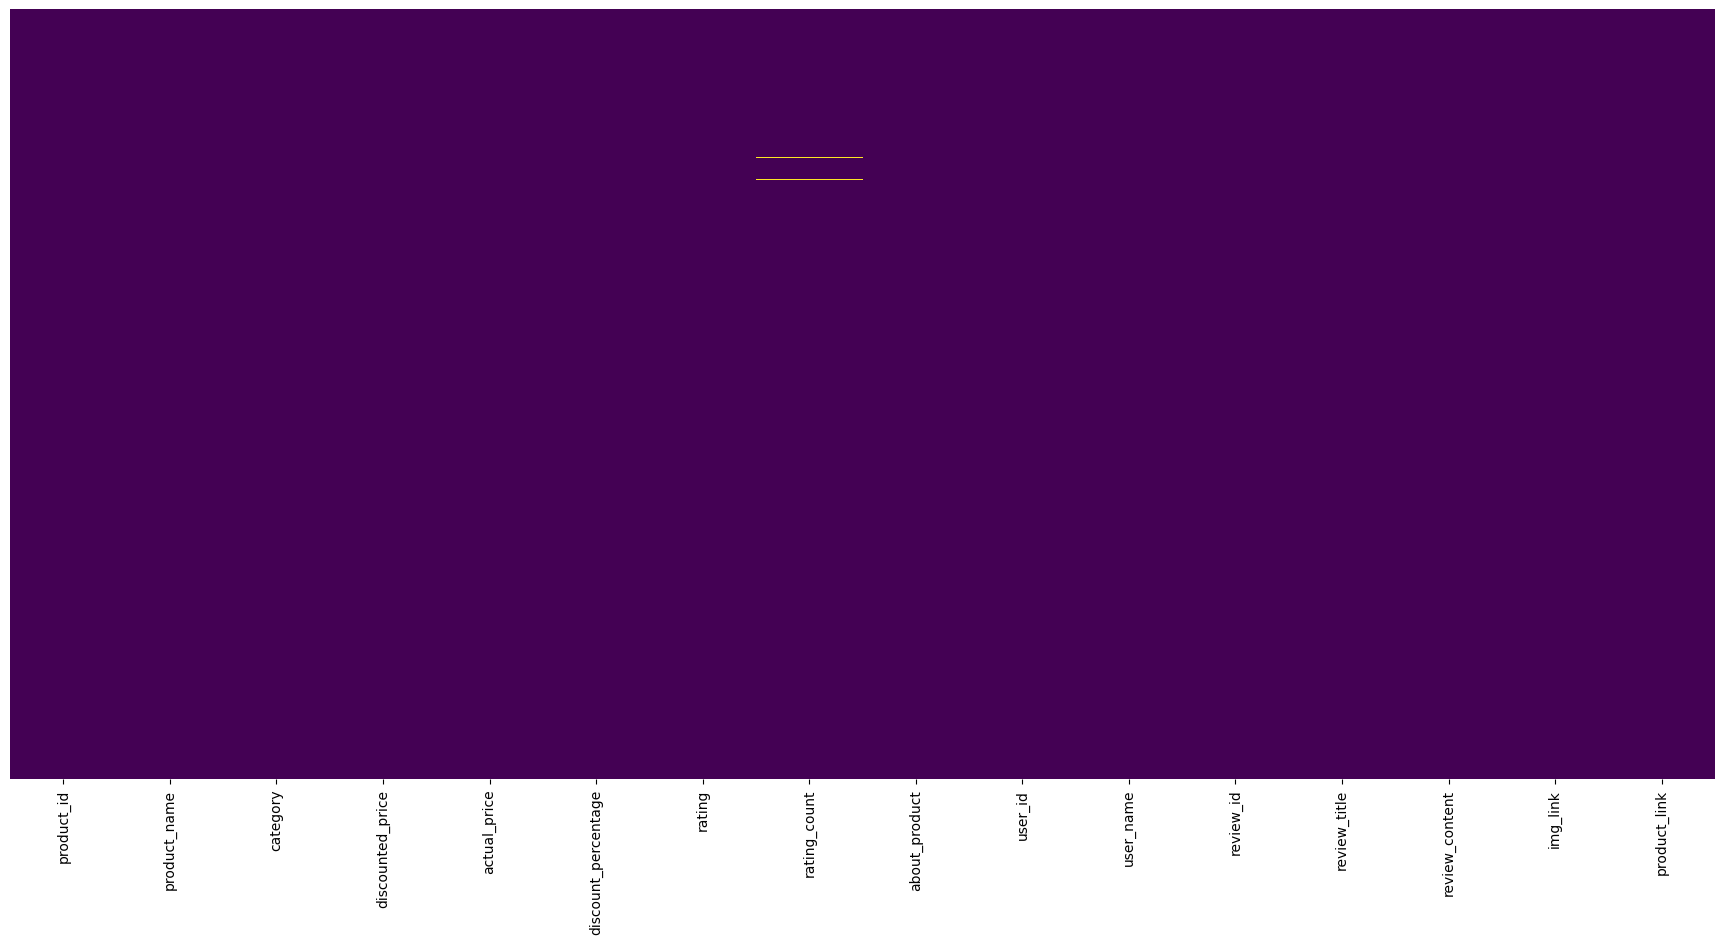

In [74]:
# memvisualisasikan nilai-nilai yang hilang (missing values) dalam DataFrame df menggunakan heatmap dari library Seaborn nilai yang bisi missing akan bergaris horizontal berwarna kuning
plt.figure(figsize=(22, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

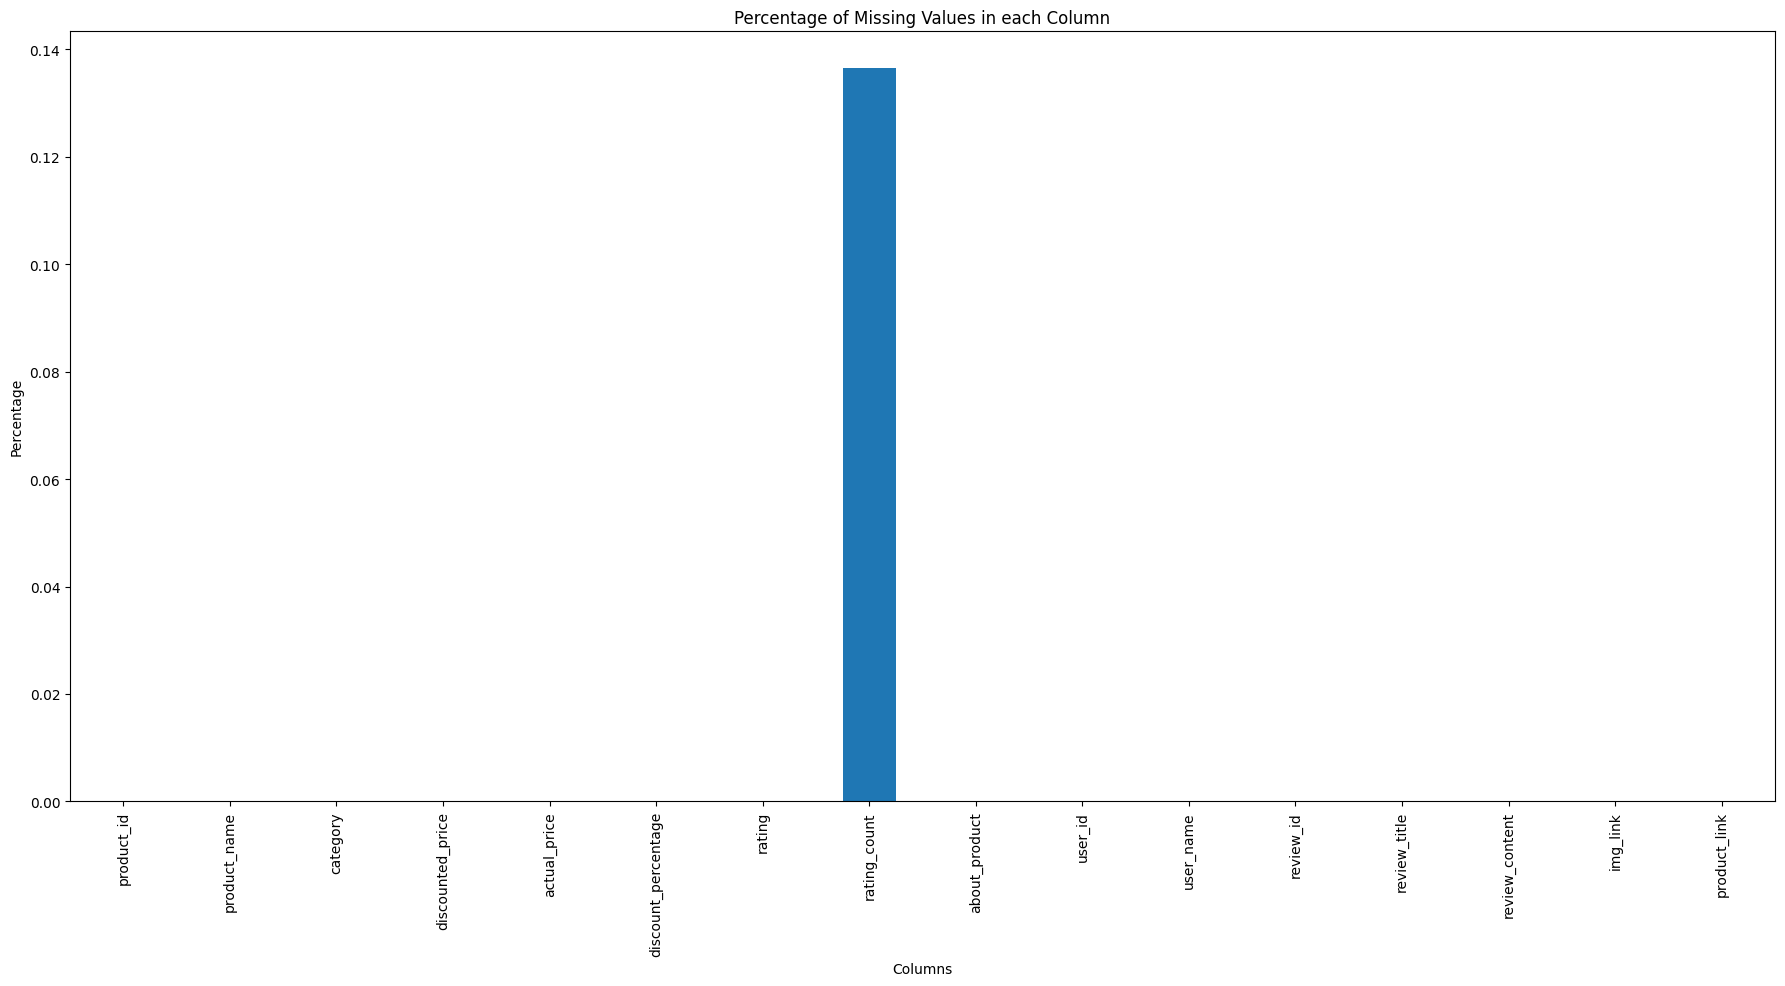

In [75]:
#Kode Python ini berfungsi untuk menghitung persentase nilai yang hilang (missing values) pada setiap kolom 
# make figure size
plt.figure(figsize=(22, 10))
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [76]:
#menampilkan 5 baris pertama dari DataFrame df yang memiliki nilai kosong (NaN) di kolom rating_count
df[df['rating_count'].isnull()].head(5)

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             199.0   
324  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage  rating  rating_count  \
282         999.0                 0.80     3.0           NaN   
324         999.0                 0.75     5.0           NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...  
324  https://www.amazon.in/REDTECH-Lightning-Certif...

In [77]:
# mengisi nilai yang hilang (NaN) pada kolom rating_count dengan nilai median dari kolom tersebut.
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [78]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Berhasil menghilangkan data yang bernilai null

# Menemukan Data Duplikasi dan Menganalisis

In [79]:
df.duplicated().any()

False

In [80]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [81]:
#memeriksa apakah terdapat duplikat lengkap (baris yang seluruh nilainya sama persis) pada kolom-kolom tertentu dalam DataFrame df
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any() 

Tidak ditemukan data yang terduplikat

# Data Visualization

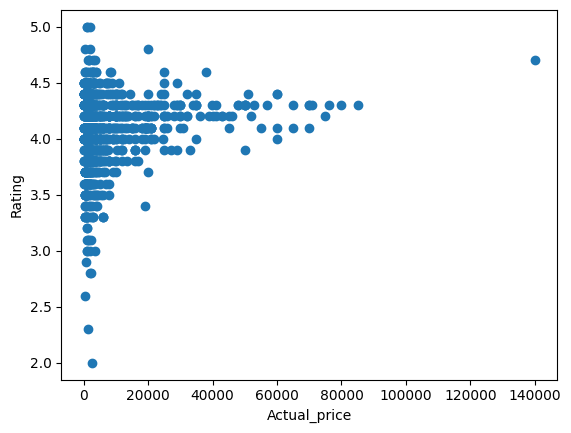

In [82]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

In [83]:
# menonaktifkan semua peringatan (warnings) di Python
import warnings
warnings.filterwarnings('ignore')

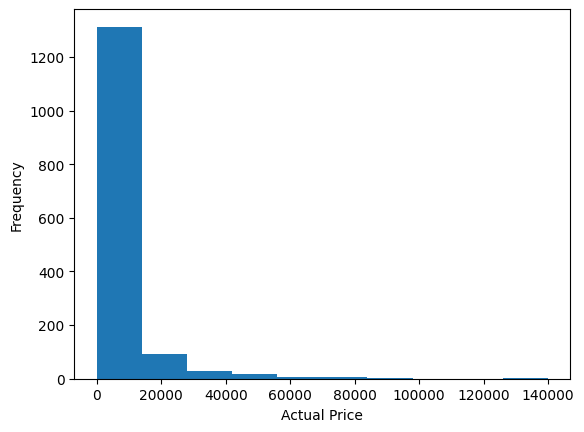

In [84]:
# membuat histogram untuk memvisualisasikan distribusi harga asli (actual_price).
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [85]:
#mengubah data kategori (teks) menjadi angka (label) menggunakan teknik Label Encoding    
from sklearn.preprocessing import LabelEncoder

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()

df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

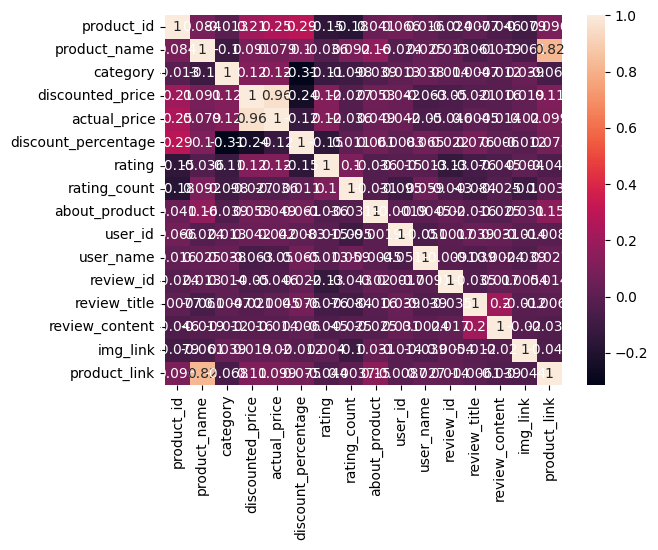

In [86]:
# menghitung matriks korelasi antara variabel-variabel numerik dalam DataFrame df, lalu menampilkannya dalam bentuk heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

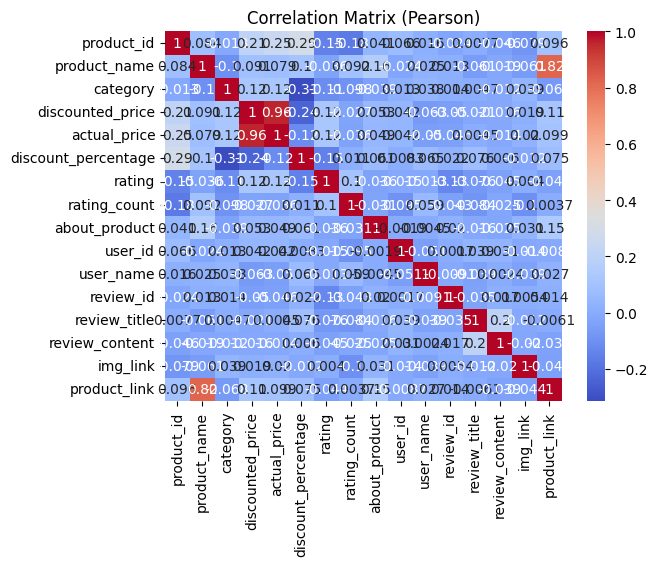

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

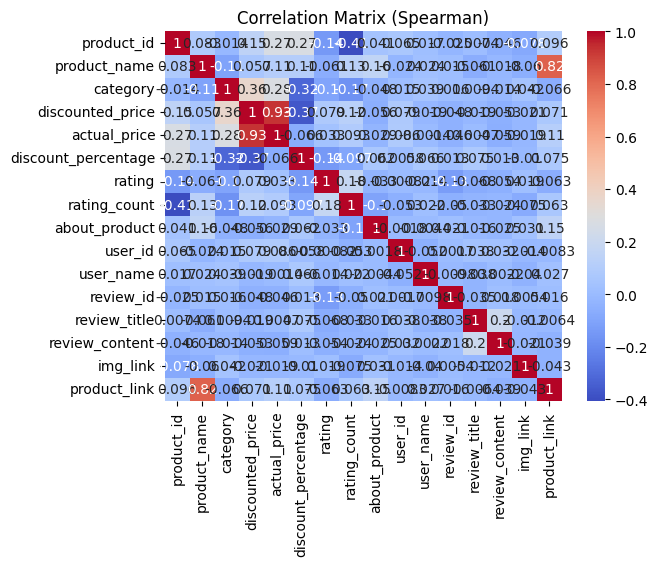

In [87]:
#melakukan analisis korelasi pada DataFrame df menggunakan dua metode:korelasi pada DataFrame df menggunakan dua metode: Pearson correlation dan Spearman correlation. Tujuannya adalah untuk mengukur hubungan antara pasangan variabel numerik dalam dataset dan memvisualisasikan hasilnya menggunakan heatmap
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = df.corr(method="spearman")

# Print the Spearman correlation matrix
print(spearman_correlation_matrix)

# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()


In [88]:
#menghitung statistik ringkasan (summary statistics) dari beberapa variabel numerik dalam DataFrame df, dikelompokkan berdasarkan beberapa variabel kategorikal.
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)


category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


In [89]:
# melakukan uji-t (t-test) untuk membandingkan rating produk antara dua kategori yaitu "electronics" dan "clothing" dalam DataFrame df. Uji-t ini akan menentukan apakah terdapat perbedaan yang signifikan secara statistik antara rata-rata rating dari kedua kategori tersebut
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(df[df['category'] == 'electronics']['rating'], df[df['category'] == 'clothing']['rating'])
print(t_statistic, p_value)

nan nan


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int32  
 1   product_name         1465 non-null   int32  
 2   category             1465 non-null   int32  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   int32  
 9   user_id              1465 non-null   int32  
 10  user_name            1465 non-null   int32  
 11  review_id            1465 non-null   int32  
 12  review_title         1465 non-null   int32  
 13  review_content       1465 non-null   int32  
 14  img_link             1465 non-null   int32  
 15  product_link         1465 non-null   i

In [91]:
#membuat tabel kontingensi untuk melihat hubungan antara actual_price dan rating
contigency_table = pd.crosstab(df['actual_price'], df['rating'])
contigency_table

rating        2.0  2.3  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
actual_price                                                                    
39.0            0    0    0    0    0    0    0    0    0    0    0    1    0   
50.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
59.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
75.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
79.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
74999.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
75990.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
79990.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
85000.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
139900.0        0    0    0    0    0    0    0    0    0    0    0    0    0   

rating        3.8  3.9  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  5.0  
actual_price                                                              
39.0            1    0    0    0    0    0    0    0    0    0    0    0  
50.0            0    0    0    0    0    1    0    0    0    0    0    0  
59.0            1    0    0    0    0    0    0    0    0    0    0    0  
75.0            0    0    0    1    0    0    0    0    0    0    0    0  
79.0            0    0    1    0    0    0    0    0    0    0    0    0  
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
74999.0         0    0    0    0    1    0    0    0    0    0    0    0  
75990.0         0    0    0    0    0    1    0    0    0    0    0    0  
79990.0         0    0    0    0    0    1    0    0    0    0    0    0  
85000.0         0    0    0    0    0    1    0    0    0    0    0    0  
139900.0        0    0    0    0    0    0    0    0    0    1    0    0  

[449 rows x 25 columns]

In [92]:
# melakukan uji chi-square pada tabel kontingensi yang telah dibuat sebelumnya untuk menguji apakah ada hubungan yang signifikan antara kategori harga dan rating produk.
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 8635.264277480239
p-value: 1.0
Degrees of freedom: 10752
Expected:
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


 Chi-square statistic (8635.264277480239) Semakin besar nilai chi-square, semakin besar kemungkinan terdapat hubungan antara kedua variabel tersebut.

 P-value (1.0) nilai p-value 1.0 sangat tinggi, yang berarti sangat mungkin

 Degrees of freedom (10752)  menunjukkan jumlah nilai dalam perhitungan statistik yang dapat bervariasi secara bebas.


In [93]:
# mengubah kembali data yang telah diubah ke bentuk label numerik menjadi data kategori (teks) aslinya. Proses ini disebut "inverse transform" dalam konteks Label Encoding.

df['product_id'] = le_product_id.inverse_transform(df['product_id'])
df['category'] = le_category.inverse_transform(df['category'])
df['review_id'] = le_review_id.inverse_transform(df['review_id'])
df['review_content'] = le_review_content.inverse_transform(df['review_content'])
df['product_name'] = le_product_name.inverse_transform(df['product_name'])
df['user_name'] = le_user_name.inverse_transform(df['user_name'])
df['about_product'] = le_about_product.inverse_transform(df['about_product'])
df['user_id'] = le_user_id.inverse_transform(df['user_id'])
df['review_title'] = le_review_title.inverse_transform(df['review_title'])
df['img_link'] = le_img_link.inverse_transform(df['img_link'])
df['product_link'] = le_product_link.inverse_transform(df['product_link'])

# Analisis Deskriptif dan Analisis Eksploratif
Q1: Berapa rata-rata rating untuk setiap kategori produk?
Q2: Apa produk dengan jumlah rating terbanyak berdasarkan kategori?
Q4: Bagaimana rata-rata persentase diskon bervariasi di setiap kategori?
Q8: Berapa korelasi antara harga diskon dan rating?
Q9: Apa 5 kategori teratas berdasarkan rating tertinggi?

Q3: Bagaimana distribusi harga diskon dibandingkan dengan harga asli?
Q5: Apa nama produk yang paling populer?
Q6: Apa kata kunci produk yang paling populer?
Q7: Apa ulasan produk yang paling populer?

In [94]:
#Q1: Berapa rata-rata rating untuk setiap kategori produk?
import pandas as pd

print(df["rating"].dtype)

# jika tipe data bukan numerik maka akn di convert ke numerik
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Handle potential errors

average_ratings = df.groupby("category")["rating"].mean().reset_index()

print(average_ratings)

float64
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


Output menunjukkan bahwa sebagian besar kategori produk mendapatkan umpan balik positif dari pelanggan, dengan rata-rata penilaian di atas 3.50. Namun, beberapa kategori (seperti kategori 2 dan 3) memiliki penilaian yang lebih rendah, mengindikasikan adanya area yang perlu ditingkatkan. Analisis lebih lanjut terhadap kategori-kategori ini dapat membantu mengidentifikasi alasan spesifik mengapa umpan baliknya rendah serta mencari solusi potensial untuk mengatasi masalah tersebut.

In [95]:
#Q2: Apa produk dengan jumlah rating terbanyak berdasarkan kategori?    
import pandas as pd

top_reviewed_per_category = (
    df.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)

     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...            2339.0   
1    Co

menyoroti produk-produk yang kemungkinan populer dalam kategori masing-masing berdasarkan jumlah ulasan yang tinggi menunjukkan tingkat perhatian dan umpan balik yang bervariasi di antara produk. Sebagian besar produk yang terdaftar memiliki rating di atas 3.5, mengindikasikan pengalaman pelanggan yang umumnya positif. Produk dengan jumlah ulasan tertinggi dalam kategori mereka dapat dianggap sebagai calon penjualan teratas, meskipun tanpa data penjualan langsung.

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    0.420
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   0.785
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           0.350
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        0.565
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           0.465
                                                                                                                          ...  
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        0.000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|L

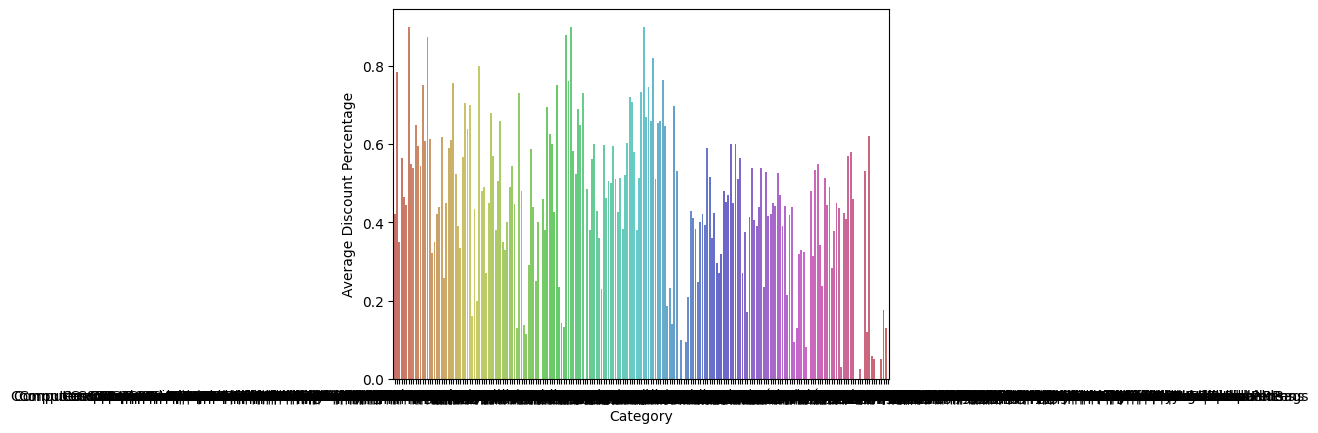

In [96]:
#Q4: Bagaimana rata-rata persentase diskon bervariasi di setiap kategori?   

import seaborn as sns
import matplotlib.pyplot as plt

avg_discount_per_category = df.groupby('category')['discount_percentage'].mean()
print(avg_discount_per_category)
palette = sns.color_palette("hls", len(avg_discount_per_category.index))
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette=palette)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.show()


Persentase diskon rata-rata bervariasi secara signifikan di berbagai kategori produk, mulai dari 0% hingga 78,39%.

Kategori 1 dan 3 menonjol dengan diskon rata-rata yang jauh lebih tinggi (78,39% dan 56,34%), menunjukkan kemungkinan adanya upaya cuci gudang, persaingan tinggi, atau margin keuntungan yang lebih rendah.

Kategori 0, 206, 207, dan 210 memiliki diskon rata-rata 0%, mengindikasikan penetapan harga yang konsisten atau permintaan yang kuat untuk produk-produk dalam kategori tersebut.

Kategori-kategori lain menunjukkan persentase diskon yang bervariasi, kemungkinan mencerminkan strategi penetapan harga yang beragam dan dinamika pasar yang berbeda.

In [97]:
#Q8: Berapa korelasi antara harga diskon dan rating?    
# menghitung correlation coefficient
correlation_coefficient = df["discounted_price"].corr(df["rating"])
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")


Correlation between discounted_price and rating: 0.12


Harga diskon dan rating memiliki korelasi positif yang lemah. Artinya, produk dengan harga diskon yang lebih tinggi cenderung memiliki rating yang sedikit lebih tinggi, tetapi hubungan ini tidak terlalu kuat.

In [98]:
#Q9: Apa 5 kategori teratas berdasarkan rating tertinggi?   
# Group data by category dan menghitung average rating
average_ratings = df.groupby("category")["rating"].mean().reset_index()

# Sort by average rating dalam urutan descending 
average_ratings = average_ratings.sort_values(by="rating", ascending=False)


print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")

Top 5 categories with highest average ratings:
1. Computers&Accessories|Tablets: 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters: 4.50
3. Electronics|Cameras&Photography|Accessories|Film: 4.50
4. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients: 4.50
5. OfficeProducts|OfficeElectronics|Calculators|Basic: 4.50


5 kategori teratas memiliki rata-rata penilaian antara 4,50 dan 4,60, menunjukkan tingkat kepuasan pelanggan yang positif secara keseluruhan dalam bidang-bidang ini.

Sebagian besar kategori dengan rating tinggi termasuk dalam domain terkait teknologi, seperti tablet, perangkat jaringan, aksesori fotografi, perangkat streaming media, dan kalkulator.

Dalam kategori yang lebih luas seperti "Komputer & Aksesoris" dan "Elektronik", terdapat subkategori tertentu yang memiliki rating sangat baik, seperti tablet, adaptor powerline, aksesori film, dan klien streaming.

Empat kategori memiliki rating 4,50, menunjukkan tingkat kepuasan pelanggan yang serupa di seluruh area ini.

Kehadiran "Kalkulator Dasar" dalam 5 besar menunjukkan bahwa bahkan produk yang relatif sederhana pun dapat mencapai rating tinggi jika memenuhi kebutuhan pelanggan dengan efektif.

<Axes: >

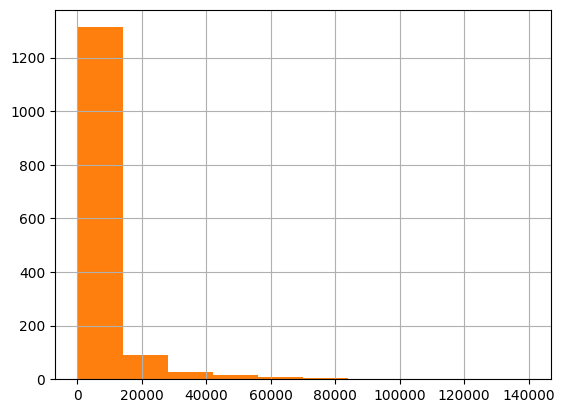

In [99]:
#Q3: Bagaimana distribusi harga diskon dibandingkan dengan harga asli?
# Membuat histograms
df["discounted_price"].hist(label="Discounted Price")
df["actual_price"].hist(label="Actual Price")

# Menghitung dan Menganalisis discount percentages
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Discount Percentage")

menunjukkan bahwa harga diskon umumnya lebih rendah daripada harga asli.

Distribusi persentase diskon miring ke kiri (skewed left), yang berarti sebagian besar produk memiliki diskon.

Output ini mengindikasikan bahwa mungkin ada peluang untuk meningkatkan harga diskon atau persentase diskon guna menarik lebih banyak pelanggan.

In [100]:
# Q5: Apa nama produk yang paling populer?
product_counts = df["product_name"].value_counts()
print(product_counts.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                 3
Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)                                3
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)                                         

Fire-Boltt Ninja Call Pro Plus Smart Watch adalah produk terpopuler, diikuti oleh Fire-Boltt Phoenix Smart Watch.

Jam Tangan Pintar dan Kabel Pengisi Daya adalah kategori produk yang paling diminati.

Terdapat beberapa merek yang terwakili, dengan boAt muncul dua kali.

Pengisian daya cepat, daya tahan, dan fungsionalitas adalah fitur-fitur kunci.

Popularitas relatif merata di luar produk terkemuka.





In [101]:
#Q6: Apa kata kunci produk yang paling populer? 
def extract_keywords(product_name):
  """Mengambil kata kunci dari nama produk, mengatasi kemungkinan angka."""
  if isinstance(product_name, str):  # mengecek apakah sebuah string
    keywords = product_name.lower().split()  # # Pisahkan menjadi kata dan ubah menjadi huruf kecil
    keywords = [word for word in keywords if word.isalpha()]  # menghapus karakter abjad
  else:
    keywords = []  
  return keywords
df["keywords"] = df["product_name"].apply(extract_keywords)
all_keywords = [keyword for keywords in df["keywords"] for keyword in keywords]
keyword_counts = pd.Series(all_keywords).value_counts()
print(keyword_counts.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


Konektivitas USB, pengisian daya (terutama pengisian cepat), dan kabel adalah fitur produk yang menonjol.

Preposisi dan konjungsi seperti "dengan", "untuk", "dan", "ke" menunjukkan fokus pada penjelasan kompatibilitas produk dan skenario penggunaan.

Kemungkinan besar dataset ini berisi banyak kabel dan perangkat pintar.
Nama produk cenderung ringkas dan menggunakan kata-kata umum, yang berpotensi dapat ditingkatkan dengan teknik ekstraksi kata kunci yang lebih canggih.

In [102]:
# Q7: Apa ulasan produk yang paling populer?    
from textblob import TextBlob #digunakan untuk analisis sentimen, menyediakan cara yang mudah untuk menghitung skor polaritas sentimen dari sebuah teks.
df[["product_id", "user_id", "review_content"]]
df["sentiment"] = df["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)
df_sorted = df.sort_values(by="sentiment", ascending=True)

# menampilkan 10 ulasan teratas
top_reviews = df_sorted.head(10)
print(top_reviews)

      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN® Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category  discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             399.0   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...         

Skor sentimen secara keseluruhan relatif rendah, menunjukkan kecenderungan ulasan netral atau sedikit negatif dalam sampel.

Ulasan dengan skor sentimen tertinggi adalah "Saya telah memasang ini di dapur saya berfungsi dengan baik" (ID produk 1463) dengan skor -0,170167, menunjukkan sentimen yang sedikit positif.

Beberapa ulasan mengungkapkan aspek positif dan negatif dalam teks yang sama, seperti "Suka dan senang,,Tolong jangan beli pemanas ini" (ID produk 1237), menunjukkan evaluasi produk yang bernuansa.



